In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

### Q1. Given 𝑓(𝑥) = 2𝑥^2 − 10𝑥^2 + 𝑥 − 5, draw the curve and find min 𝑓(𝑥) by the package SciPy in python. Interpret your result.

In [3]:
def func(x):
    return 2*x**4-10*x**2+x-5

In [4]:
res = minimize_scalar(func, method='Bounded', bounds=(-3,3))

In [5]:
res

 message: Solution found.
 success: True
  status: 0
     fun: -19.09344719019766
       x: -1.605569766752713
     nit: 13
    nfev: 13

Text(0.5, 1.0, '$f(x) = 2x^4-10x^2+x-5$')

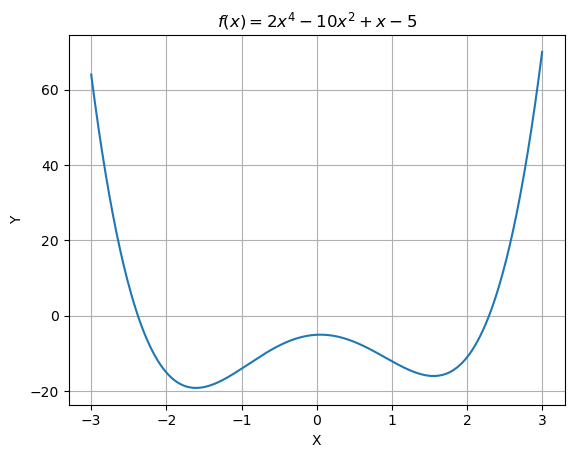

In [6]:
#Giving x its values
x=np.linspace(-3,3,500)
#Implying Y as a function of x
y=func(x)
#plotting the curve
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid('True')
plt.title('$f(x) = 2x^4-10x^2+x-5$')

#### Q2. Given 𝑓(𝑥, 𝑦) = 2𝑥 ! − 10𝑦 " + 𝑥 − 𝑦 − 25,.
####     (a) draw the graph of 𝑓(𝑥, 𝑦). Hint: when drawing the graph, you need to import the function Axes3D from mpl_toolkits.mplot3d.
####     (b) min 𝑓(𝑥, 𝑦) and max 𝑓(𝑥, 𝑦). If one of them can’t be solved, please add some constraints so that you can solve it
####     (c) When min f(x,y), show which method you choose. Try some other methods and check if there is difference. Interpret your result.

Text(0.5, 0.92, '$f(x,y)=2x^4-10y^2+x-y-25$')

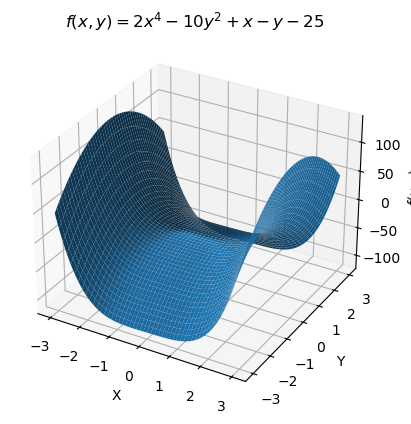

In [7]:
from scipy.optimize import minimize 
from mpl_toolkits.mplot3d import Axes3D

def f(vars):
    x,y=vars
    return 2*x**4-10*y**2+x-y-25

#X-values
x=np.linspace(-3,3,500)
#Y-Values
y=np.linspace(-3,3,500)
x,y =np.meshgrid(x,y)
#z values
z = f((x,y))


fig = plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x,y)')
ax.set_title('$f(x,y)=2x^4-10y^2+x-y-25$')

In [8]:
#b) min(f(x,y)) 

#initial guess
initial_guess=[0,0]

#bounds
bounds = [(-3,3), (-3,3)]

#minimise
result_min = minimize(f, initial_guess, bounds=bounds)
result_min.fun

-118.3749999999764

In [9]:
#max(f(x,y))
result_max = minimize(lambda xy: -f(xy), initial_guess, bounds = bounds)
result_max.fun

-140.02499999999864

c) The minimum value of 𝑓(𝑥,𝑦)=−140.02499.
f(x,y)=−140.02499 indicates the lowest point of the function within the region you evaluated. This corresponds to the global minimum of the function. It suggests that there is a specific pair of values (𝑥 min, 𝑦 min) that yields this minimum value. In terms of optimization, this is the point where the function 𝑓(𝑥,𝑦) is at its "deepest valley."

The maximum value of 𝑓(𝑥,𝑦)=−118.3746 indicates the highest point of the function in the region you're analyzing. However, this "maximum" is still negative, so it's the highest point within a particular domain, but not a true global maximum since the function may tend towards infinity without strict constraints on 𝑥 or y.

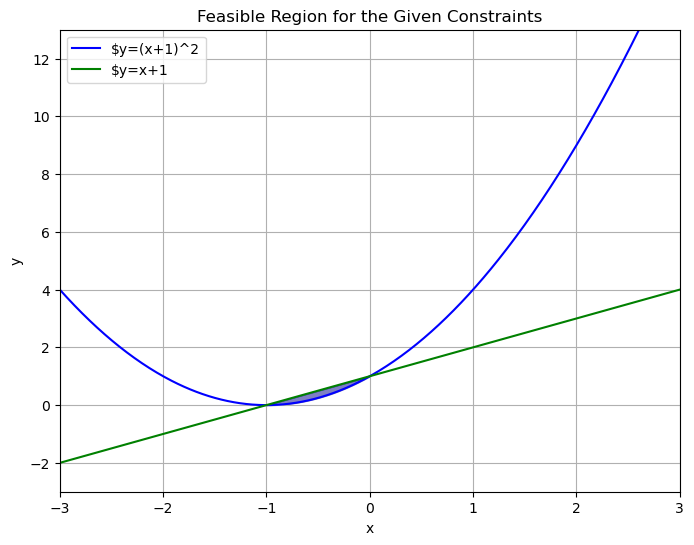

In [10]:
#Array of X values
x_vals = np.linspace(-3,3,500)

#Constraints
y1_vals = (x_vals + 1)**2
y2_vals = x_vals + 1

#Create the plot
plt.figure(figsize=(8,6))
plt.plot(x_vals, y1_vals, label=r'$y=(x+1)^2', color = 'blue')
plt.plot(x_vals, y2_vals, label=r'$y=x+1',color='green')

#Fill the area under y = (x_vals +1)**2
plt.fill_between(x_vals, y1_vals, y2_vals, where=(y2_vals >= y1_vals), interpolate = True, color='darkblue', alpha = 0.5)

# Labels and title
plt.title('Feasible Region for the Given Constraints')
plt.xlabel('x')
plt.ylabel('y')

#Dsiplay the feasible region
plt.legend()
plt.grid(True)
plt.xlim([-3,3])
plt.ylim([-3,13])
plt.show()

In [11]:
def obj_func(cars):
    x,y=cars
    return (x-2)**2 + (y-1)**2

def con1(cars):
    x,y=cars
    return y-(x+1)**2

def con2(cars):
    x,y=cars
    return y-(x+1)

initial_guess = [0,0]

constraints = [
                {'type': 'ineq', 'fun': con1},
                {'type': 'ineq', 'fun': con2}
            ]

result = minimize(obj_func, initial_guess, constraints=constraints)

print(f"optimal solution: x = {result.x[0]}, y={result.x[1]}")
print(f"Minimum value of the objective function: {result.fun}")


optimal solution: x = 0.28961769091625084, y=1.6631137307652328
Minimum value of the objective function: 3.3651274631560435


The function 𝑓(𝑥,𝑦)=(𝑥−2)2+(𝑦−1)2 represents the squared Euclidean distance between the point (𝑥,𝑦) and the point (2,1). Your goal was to find the point (𝑥,𝑦) within the feasible region (satisfying the constraints) that is closest to (2,1).

The solution 𝑥=0.2896 and 𝑦=1.6631 gives the point that minimizes this distance, resulting in a minimum value of 𝑓(𝑥,𝑦)=3.3651. This means that the closest point to (2,1), while still obeying the constraints, is (0.2896,1.6631), and the squared distance between these two points is approximately 3.3651.

#### Q4) Given linear program problem:
####     min 2𝑥 + 3𝑦, 𝑠. 𝑡. 𝑥 + 𝑦 ≤ 1, 𝑦 − 𝑥 ≥ 0, 𝑥 ≥ 0
####     (a) Draw the feasible region
####     (b) Solve it by using the function linprog from Scipy.optimize
####     (c) Interpret your result


Text(0.5, 1.0, 'Feasible Region')

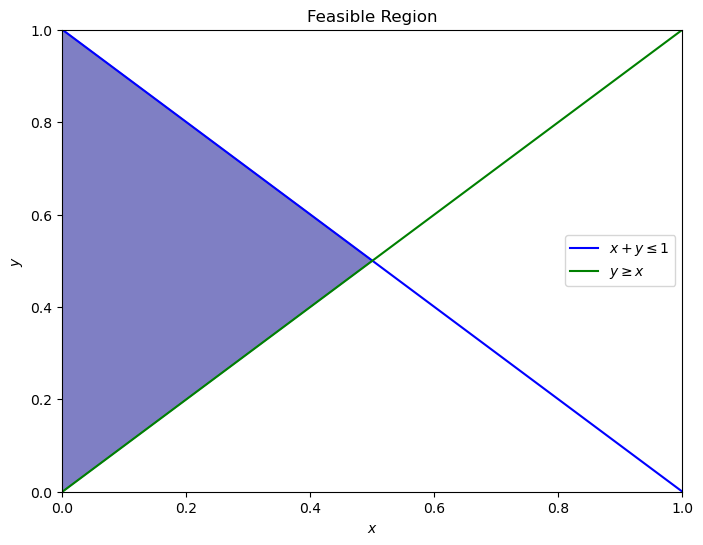

In [12]:
#a)

#Array of X values
x_vals = np.linspace(-3,3,500)

#Constraints
y1_vals = 1-x_vals
y2_vals = x_vals

#Create the plot
plt.figure(figsize=(8,6))
plt.plot(x_vals, y1_vals, label=r'$x+y \leq 1$', color = 'blue')
plt.plot(x_vals, y2_vals, label=r'$y \geq x$',color='green')

#Fill the area under y = (x_vals +1)**2
plt.fill_between(x_vals, y2_vals, y1_vals, where=(y1_vals >= y2_vals), color='darkblue', alpha = 0.5)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.title("Feasible Region")

In [14]:
#b)

from scipy.optimize import linprog

#Objective function co-efficients (minimize 2x+3y)
c=(2,3)

#Inequality constraints
A= [[1,1],
    [-1, 1]
    ]
b= [1,0]

#Bounds
x_bound = [0, None]
y_bound = [0, None]

result1 = linprog(c, A_ub=A, b_ub=b, bounds=[x_bound, y_bound], method='highs')

print(f"Optimal function: x={result1.x[0]}, y={result1.x[1]}")
print(f"Minimum Value of the objective function: {result1.fun}")

Optimal function: x=0.0, y=0.0
Minimum Value of the objective function: 0.0


#### Q3

A small company has developed two versions of a new product. Each version of the product is made from the same raw material that costs __$10/g__ and requires two different types of specialized labor. $U$ is the higher-priced version of the product. $U$ sells for __$270 per unit__ and requires __10g__ of raw material, __1 hour of labor type $A$__, and __2 hours of labor type B.__

Due to the higher price, the market demand for $U$ is limited to __40 units per week.__ $V$ is the lower-priced version of the product that sells for __$210 per unit__ with __unlimited demand__ and requires __9g of raw material, 1 hour of labor type A, and 1 hour of labor type B.__ The availability of labor and the raw materials inventory limits weekly production in the company. The raw material must be ordered in advance and has a short shelf life. Any raw material left over at the end of the week is discarded.

The availability of labor and the raw materials inventory limits weekly 
production in the company. The raw material must be ordered in advance and 
has a short shelf life. Any raw material left over at the end of the week is 
discarded. The table below details the cost and availability of raw materials and 
labor.

| Resource | Amount Available | Cost |
|----------|------------------|------|
| Raw material | No limits | $10/g |
| Labor A | 80 hours | $50/hr |
| Labor B | 100 hours | $40/hr |


Ans:

**Variables that determine the optimisation:**
- $x_U$: No. of units of  $U$ produced per week
- $x_V$: No. of units of $V$ produced per week
- $R$: Raw material consumed per week

**Objective Function:**

The goal is to maximize the gross profit, which is the revenue from selling products - cost of raw materials and labor.

- Earnings from $U$: $270 \times x_U$
- Revenue from $V$: $210 \times x_V$
- Cost of raw materials: $10 \times R$
- Cost of labor $A$: $50 \times (x_U + x_V)$
- Cost of labor $B$: $40 \times (2x_U + x_V)$
- Objective function:  $max( 270x_U + 210x_V - 10R - 50(x_U + x_V) - 40(2x_U + x_V))$

**Constraints:**
- Raw material constraint: $10x_U + 9x_V \leq R$
- Labor A constraint: $x_U + x_V \leq 80$
- Labor B constraint: $2x_U + x_V \leq 100$
- Demand constraint for U: $x_U \leq 40$
- Non-negativity constraints: $x_U \geq 0, x_V \geq 0, R \geq 0$


In [15]:
# Coefficients for the objective function
# Coefficients for x_U, x_V, R
c = [-1 * (270 - 50 - 80), -1 * (210 - 50 - 40), 10]

# Coefficients for the inequality constraints
A = [
    [10, 9, -1],  # 10x_U + 9x_V <= R
    [1, 1, 0],    # x_U + x_V <= 80
    [2, 1, 0],    # 2x_U + x_V <= 100
    [-1, 0, 0],   # -x_U <= -40 (x_U <= 40)
]

# list for rhs
b = [0, 80, 100, -40]

# bounds
x_bounds = (0, None)
R_bounds = (0, None)
bounds = [x_bounds, x_bounds, R_bounds]

result = linprog(c,
                 A_ub=A,
                 b_ub=b,
                 bounds=bounds)

# Extract the results
x_U, x_V, R = result.x

print(f"Optimal number of units of U to produce: {x_U}")
print(f"Optimal number of units of V to produce: {x_V}")
print(f"Optimal amount of raw material to order: {R} grams")
print(f"Maximum gross profit: {-result.fun}")

Optimal number of units of U to produce: 40.0
Optimal number of units of V to produce: 20.0
Optimal amount of raw material to order: 580.0 grams
Maximum gross profit: 2200.0


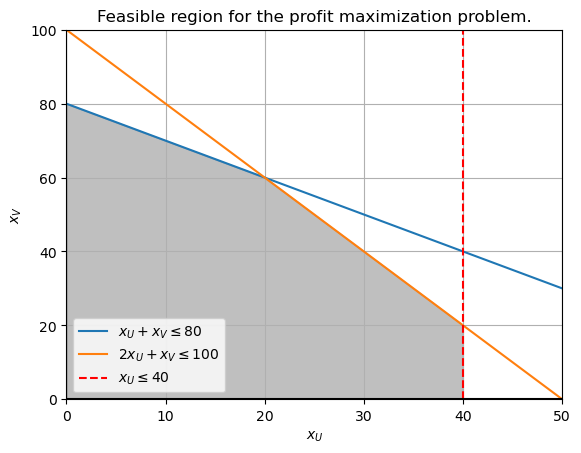

In [16]:
# Define the constraints
x_U = np.linspace(0, 50, 400)

# Constraints
x_V1 = 80 - x_U
x_V2 = 100 - 2 * x_U

plt.plot(x_U, x_V1, label=r'$x_U + x_V \leq 80$')
plt.plot(x_U, x_V2, label=r'$2x_U + x_V \leq 100$')

plt.axvline(x=40, color='r', linestyle='--', label=r'$x_U \leq 40$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

# feasible region
plt.fill_between(x_U, np.maximum(0, np.minimum(x_V1, x_V2)), where=(x_U <= 40), color='gray', alpha=0.5)

plt.xlim((0, 50))
plt.ylim((0, 100))
plt.title('Feasible region for the profit maximization problem.')
plt.grid(True)
plt.xlabel(r'$x_U$')
plt.ylabel(r'$x_V$')
plt.legend()

plt.show()